/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 720x864 with 0 Axes>

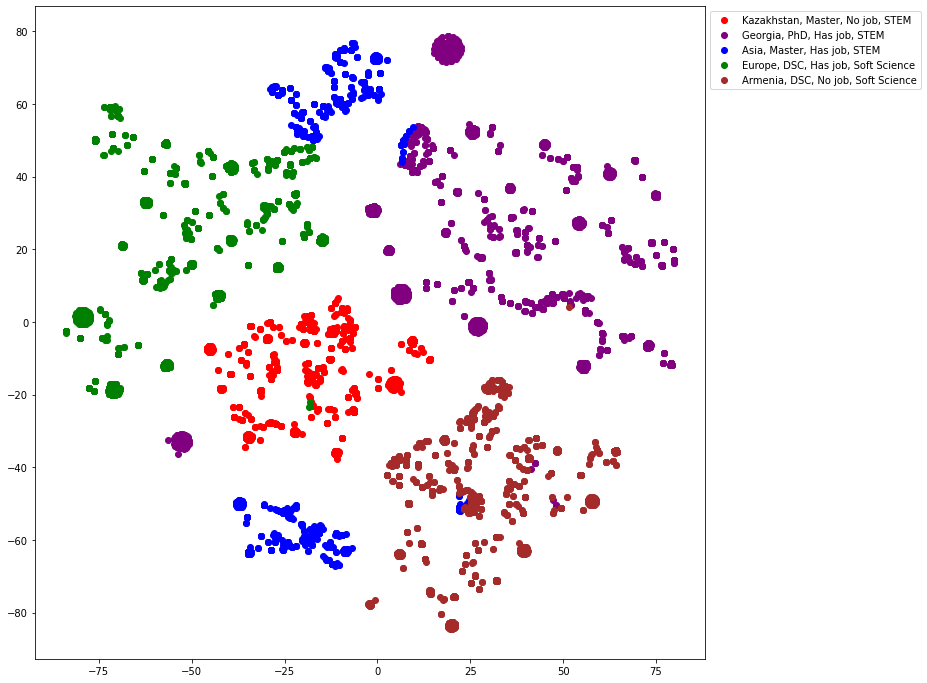

In [26]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ISwifton/Clustering-of-sociological-data/main/Relocations.csv'
Real_rawdata=pd.read_csv(url)
Real=Real_rawdata.to_numpy()
dim = len(Real)
Real_final=np.zeros((dim,dim))

# Compute pairwise distance matrix (Job)
for i in range(dim):
  for j in range(dim):
   Real_final[i][j]=(sum(abs(Real[i]-Real[j])))

# Make clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
Real_tsne = TSNE(n_components=2, random_state=0)
Real_kmns = KMeans(n_clusters=5).fit(Real_final)

Real_2d = Real_tsne.fit_transform(Real_final)
Real_y=Real_kmns.labels_

#Real_rawdata.loc[:, "5"] = list(Real_y)
new_2d = np.append(Real_2d, Real_y[:,None],1)

Real_target_ids = range(len(Real_y))

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 12))
colors = 'r', 'g', 'b', 'c', 'm'

lables = '0', '1', '2', '3', '4'
#print(new_2d[:,2])
#print(new_2d)

category_to_color = {0: 'red', 1: 'purple', 2:'blue', 3: 'green',  4: 'brown'}
category_to_label = {0: 'Kazakhstan, Master, No job, STEM', 1:'Georgia, PhD, Has job, STEM', 2:'Asia, Master, Has job, STEM', 3:'Europe, DSC, Has job, Soft Science',  4:'Armenia, DSC, No job, Soft Science'}

# plot each category with a distinct label
fig, ax = plt.subplots(1,1, figsize=(12, 12))
for category, color in category_to_color.items():
    mask = new_2d[:, 2] == category
    ax.plot(new_2d[mask, 0], new_2d[mask, 1], 'o', 
            color=color, label=category_to_label[category])

ax.legend(loc="upper left", bbox_to_anchor=(1,1))